# Simple Linear Regression. Minimal example. Exercise - Solution

# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.
    2. Change the number of observations to 1,000,000 and see what happens.
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
## $$ \Sigma_i = |y_i-t_i| $$
    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

You can either use this file for all the exercises, or check the solutions of EACH ONE of them in the separate files we have provided. All other files are solutions of each problem. If you feel confident enough, you can simply change values in this file. Please note that it will be nice, if you return the file to starting position after you have solved a problem, so you can use the lecture as a basis for comparison.

## Import relevant libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt

#nice 3D graphs
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

This part is not part of the ML algorithm, create "fake" data, cuz in real-life, we would normally import data from some external sources.

In [51]:
observations = 1000

Xs = np.random.uniform(-10, 10, size=(observations,1))
Zs = np.random.uniform(-10, 10, size=(observations,1))

#Combine to become a matrix
inputs = np.column_stack((Xs,Zs))

print(inputs.shape)

(1000, 2)


## Elements of the model in supervized learning

1) inputs => done 

2) weights => computer

3) biases => computer

4) outputs => computer

5) targets => to do

## Create the targets we will aim at

### Targets = f(x,z) = 2x - 3z + 5 + noise

2 is the target weight_1

-3 is the target weight_2

5 is the target bias

In [101]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*Xs - 3*Zs + 5 + noise

print(targets.shape)

(1000, 1)


## Initialize variable

In [133]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print (weights)
print (biases.shape)

[[-0.0308484 ]
 [-0.02032308]]
(1,)


### Set a learning rate

In [134]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 1

## Train the model

In [135]:
for i in range(5):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 /observations
    
    print(loss)
    
    deltas_scaled = deltas/observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

225.96356913618135
219642.4494453925
227368711.75893295
236598845559.3868
247558875822098.7


### Print weights and biases and see if we have worked correctly.

In [136]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 5.27931080e+07]
 [-1.13056988e+08]] [-631652.66243359]


(Learning rate: 0.0001):

1st: weights: Xs=0.5, Zs=-0.8, bias = 0.10

2nd: weights: Xs=0.92, Zs=-1.42, bias = 0.15

3rd: weights: Xs=1.22, Zs=-1.86, bias = 0.2

12th: weights: Xs = 1.99, Zs = -2.9, bias = 0.63

...

100th: weights: Xs = 2, Zs = -2.999, bias = 4.9


Learning rate =0.1, 1 cannot apply the same numbers such as init_range..., cannot find appropriate answer.

### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

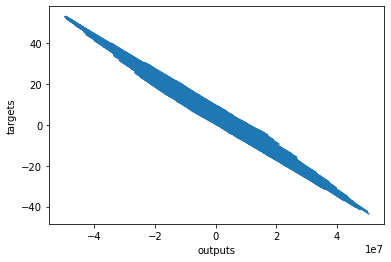

In [137]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()